In [5]:
!pip install seaborn
!pip install ipywidgets
!pip install -U scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from matplotlib import animation, rc
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from IPython.display import display, clear_output, HTML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

rc('animation', html='jshtml')

First, we'd like to import our files and join them together into one big file.


In [7]:
all_weeks_input = glob.glob("D:/2nd  year/1st term/Machine learning/project/nfl-big-data-bowl-2026-prediction/train/input_*.csv")
all_weeks_output = glob.glob("D:/2nd  year/1st term/Machine learning/project/nfl-big-data-bowl-2026-prediction/train/output_*.csv")
print(f'Input data for training consists of {len(all_weeks_input)} files.')
print(f'Output data for training consists of {len(all_weeks_output)} files.')
df_list_input = [pd.read_csv(f) for f in all_weeks_input]
df_list_output = [pd.read_csv(f) for f in all_weeks_output]
df_input0 = pd.concat(df_list_input, ignore_index=True)
df_output = pd.concat(df_list_output, ignore_index=True)


Input data for training consists of 18 files.
Output data for training consists of 18 files.


In [8]:

print("=" * 50)
print("         **** Input Datafram Info ****")
df_input0.info(show_counts=True)
print('Number of missing values in input file:')
df_input0.isnull().sum()

         **** Input Datafram Info ****
<class 'pandas.DataFrame'>
RangeIndex: 4880579 entries, 0 to 4880578
Data columns (total 23 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   game_id                   4880579 non-null  int64  
 1   play_id                   4880579 non-null  int64  
 2   player_to_predict         4880579 non-null  bool   
 3   nfl_id                    4880579 non-null  int64  
 4   frame_id                  4880579 non-null  int64  
 5   play_direction            4880579 non-null  object 
 6   absolute_yardline_number  4880579 non-null  int64  
 7   player_name               4880579 non-null  object 
 8   player_height             4880579 non-null  object 
 9   player_weight             4880579 non-null  int64  
 10  player_birth_date         4880579 non-null  object 
 11  player_position           4880579 non-null  object 
 12  player_side               4880579 non-null  object 
 13 

game_id                     0
play_id                     0
player_to_predict           0
nfl_id                      0
frame_id                    0
play_direction              0
absolute_yardline_number    0
player_name                 0
player_height               0
player_weight               0
player_birth_date           0
player_position             0
player_side                 0
player_role                 0
x                           0
y                           0
s                           0
a                           0
dir                         0
o                           0
num_frames_output           0
ball_land_x                 0
ball_land_y                 0
dtype: int64

In [9]:
print("=" * 50)
print("         **** Output Datafram Info ****")
df_output.info(show_counts=True)
print('Number of missing values in output file:')
df_output.isnull().sum()

         **** Output Datafram Info ****
<class 'pandas.DataFrame'>
RangeIndex: 562936 entries, 0 to 562935
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   game_id   562936 non-null  int64  
 1   play_id   562936 non-null  int64  
 2   nfl_id    562936 non-null  int64  
 3   frame_id  562936 non-null  int64  
 4   x         562936 non-null  float64
 5   y         562936 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 25.8 MB
Number of missing values in output file:


game_id     0
play_id     0
nfl_id      0
frame_id    0
x           0
y           0
dtype: int64

So we can see that there are no missing values in our data which is quite a feat!

Some preliminary EDA to check the quality of the data:
 

In [10]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
display(df_input0.head())
display(df_input0.describe(include=[np.number]))
df_input0.nunique().sort_values() 


game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  \
0  2023090700      101              False   54527         1          right   
1  2023090700      101              False   54527         2          right   
2  2023090700      101              False   54527         3          right   
3  2023090700      101              False   54527         4          right   
4  2023090700      101              False   54527         5          right   

   absolute_yardline_number player_name player_height  player_weight  \
0                        42  Bryan Cook           6-1            210   
1                        42  Bryan Cook           6-1            210   
2                        42  Bryan Cook           6-1            210   
3                        42  Bryan Cook           6-1            210   
4                        42  Bryan Cook           6-1            210   

  player_birth_date player_position player_side         player_role      x  \
0        1999-09-07              FS     Defense  Defensive Coverage  52.33   
1        1999-09-07              FS     Defense  Defensive Coverage  52.33   
2        1999-09-07              FS     Defense  Defensive Coverage  52.33   
3        1999-09-07              FS     Defense  Defensive Coverage  52.35   
4        1999-09-07              FS     Defense  Defensive Coverage  52.37   

       y     s     a     dir       o  num_frames_output  ball_land_x  \
0  36.94  0.09  0.39  322.40  238.24                 21    63.259998   
1  36.94  0.04  0.61  200.89  236.05                 21    63.259998   
2  36.93  0.12  0.73  147.55  240.60                 21    63.259998   
3  36.92  0.23  0.81  131.40  244.25                 21    63.259998   
4  36.90  0.35  0.82  123.26  244.25                 21    63.259998   

   ball_land_y  
0        -0.22  
1        -0.22  
2        -0.22  
3        -0.22  
4        -0.22

game_id       play_id        nfl_id      frame_id  \
count  4.880579e+06  4.880579e+06  4.880579e+06  4.880579e+06   
mean   2.023155e+09  2.196409e+03  4.955890e+04  1.613179e+01   
std    2.011405e+05  1.246426e+03  5.210338e+03  1.113008e+01   
min    2.023091e+09  5.400000e+01  3.084200e+04  1.000000e+00   
25%    2.023101e+09  1.150000e+03  4.519800e+04  8.000000e+00   
50%    2.023111e+09  2.171000e+03  5.241300e+04  1.500000e+01   
75%    2.023121e+09  3.246000e+03  5.450000e+04  2.200000e+01   
max    2.024011e+09  5.258000e+03  5.667300e+04  1.230000e+02   

       absolute_yardline_number  player_weight             x             y  \
count              4.880579e+06   4.880579e+06  4.880579e+06  4.880579e+06   
mean               6.055045e+01   2.112783e+02  6.050074e+01  2.681190e+01   
std                2.305935e+01   2.217747e+01  2.348919e+01  1.000620e+01   
min                1.100000e+01   1.530000e+02  4.100000e-01  6.200000e-01   
25%                4.100000e+01   1.950000e+02  4.263000e+01  1.899000e+01   
50%                6.100000e+01   2.070000e+02  6.041000e+01  2.685000e+01   
75%                8.000000e+01   2.250000e+02  7.823000e+01  3.462000e+01   
max                1.090000e+02   3.580000e+02  1.198600e+02  5.288000e+01   

                  s             a           dir             o  \
count  4.880579e+06  4.880579e+06  4.880579e+06  4.880579e+06   
mean   3.019878e+00  2.118335e+00  1.804972e+02  1.815366e+02   
std    2.227939e+00  1.415794e+00  1.007162e+02  9.800912e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.090000e+00  1.010000e+00  9.091000e+01  9.174000e+01   
50%    2.720000e+00  1.920000e+00  1.795600e+02  1.801400e+02   
75%    4.620000e+00  3.040000e+00  2.708300e+02  2.715800e+02   
max    1.253000e+01  1.712000e+01  3.600000e+02  3.600000e+02   

       num_frames_output   ball_land_x   ball_land_y  
count       4.880579e+06  4.880579e+06  4.880579e+06  
mean        1.164147e+01  6.051581e+01  2.663766e+01  
std         5.331537e+00  2.529643e+01  1.543814e+01  
min         5.000000e+00 -5.260000e+00 -3.910000e+00  
25%         8.000000e+00  4.261000e+01  1.330000e+01  
50%         1.000000e+01  6.051000e+01  2.647000e+01  
75%         1.400000e+01  7.847000e+01  3.987000e+01  
max         9.400000e+01  1.258500e+02  5.733000e+01

player_to_predict               2
play_direction                  2
player_side                     2
player_role                     4
player_height                  16
player_position                19
num_frames_output              34
absolute_yardline_number       99
frame_id                      123
player_weight                 151
game_id                       272
s                            1033
a                            1105
player_birth_date            1132
player_name                  1383
nfl_id                       1384
play_id                      4317
ball_land_y                  5030
y                            5222
ball_land_x                  7491
x                           11872
dir                         36001
o                           36001
dtype: int64

# Filtering the data to only consider the data from the players to be predicted

In [11]:
df_input = df_input0[df_input0['player_to_predict'] == True].copy()
print(f'Filtered input shape: {df_input.shape}')

Filtered input shape: (1303440, 23)


In [12]:
shared_cols = set(df_input.columns) & set(df_output.columns)
print("Shared columns:", shared_cols)
merged_data = df_input.merge(
    df_output,
    on=['game_id', 'play_id', 'nfl_id', 'frame_id'],
    suffixes=('_input', '_output')
)

print(f'Merged data shape: {merged_data.shape}')
display(merged_data.head())

Shared columns: {'nfl_id', 'y', 'game_id', 'x', 'play_id', 'frame_id'}
Merged data shape: (560426, 25)


game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  \
0  2023090700      101               True   46137         1          right   
1  2023090700      101               True   46137         2          right   
2  2023090700      101               True   46137         3          right   
3  2023090700      101               True   46137         4          right   
4  2023090700      101               True   46137         5          right   

   absolute_yardline_number  player_name player_height  player_weight  \
0                        42  Justin Reid           6-1            204   
1                        42  Justin Reid           6-1            204   
2                        42  Justin Reid           6-1            204   
3                        42  Justin Reid           6-1            204   
4                        42  Justin Reid           6-1            204   

  player_birth_date player_position player_side         player_role  x_input  \
0        1997-02-15              SS     Defense  Defensive Coverage    51.32   
1        1997-02-15              SS     Defense  Defensive Coverage    51.35   
2        1997-02-15              SS     Defense  Defensive Coverage    51.39   
3        1997-02-15              SS     Defense  Defensive Coverage    51.43   
4        1997-02-15              SS     Defense  Defensive Coverage    51.48   

   y_input     s     a     dir       o  num_frames_output  ball_land_x  \
0    20.69  0.31  0.49   79.43  267.68                 21    63.259998   
1    20.66  0.36  0.74  118.07  268.66                 21    63.259998   
2    20.63  0.44  0.76  130.89  269.78                 21    63.259998   
3    20.61  0.48  0.62  134.50  269.78                 21    63.259998   
4    20.58  0.54  0.44  129.79  269.06                 21    63.259998   

   ball_land_y  x_output  y_output  
0        -0.22     56.22     17.28  
1        -0.22     56.63     16.88  
2        -0.22     57.06     16.46  
3        -0.22     57.48     16.02  
4        -0.22     57.91     15.56

# Data preprocessing/feature engineering
From what we can see, some variables still require conversion such as player_height (convert to inches) and player_birth_date to convert to the more directly relevant player_age
partly from from notebook:https://www.kaggle.com/code/wafaaalayoubi/step-by-step-eda-for-player-prediction

In [13]:
# Converting height from foot_inch to total inches:
def height_to_inches(h):
    ft, inch = h.split('-')
    return int(ft) * 12 + int(inch)
merged_data['player_height_in'] = merged_data['player_height'].apply(height_to_inches)

In [14]:
# Calculating player age using their birthdays
merged_data['player_birth_date'] = pd.to_datetime(merged_data['player_birth_date'])
merged_data['player_age']= ((pd.Timestamp.now() - merged_data['player_birth_date']).dt.days / 365.25).round(2)
merged_data[['player_name', 'player_birth_date', 'player_age']].head()

player_name player_birth_date  player_age
0  Justin Reid        1997-02-15       28.72
1  Justin Reid        1997-02-15       28.72
2  Justin Reid        1997-02-15       28.72
3  Justin Reid        1997-02-15       28.72
4  Justin Reid        1997-02-15       28.72

In [15]:
# Standardizing play direction to avoid having mirrored coordinate systems by converting all plays to right
df_left = merged_data[merged_data['play_direction'] == 'left'].copy()
df_right = merged_data[merged_data['play_direction'] == 'right'].copy()
df_left['x'] = 120 - df_left['x']
df_left['y'] = 53.3 - df_left['y']
df_left['o'] = (df_left['o'] + 180) % 360
df_left['dir'] = (df_left['dir'] + 180) % 360
df_left['ball_land_x'] = 120 - df_left['ball_land_x']
df_left['ball_land_y'] = 53.3 - df_left['ball_land_y']
processed_df_input = pd.concat([df_left, df_right], ignore_index=True)

KeyError: 'x'

In order to verify that the standardized coordinates are mirrored correctly:

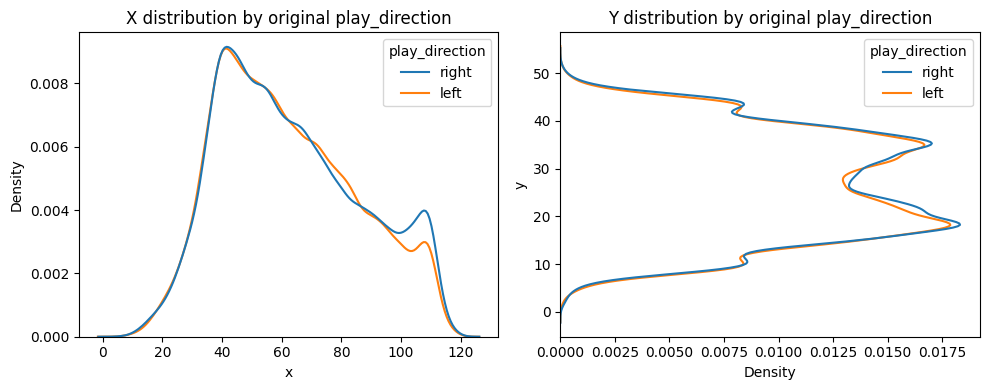

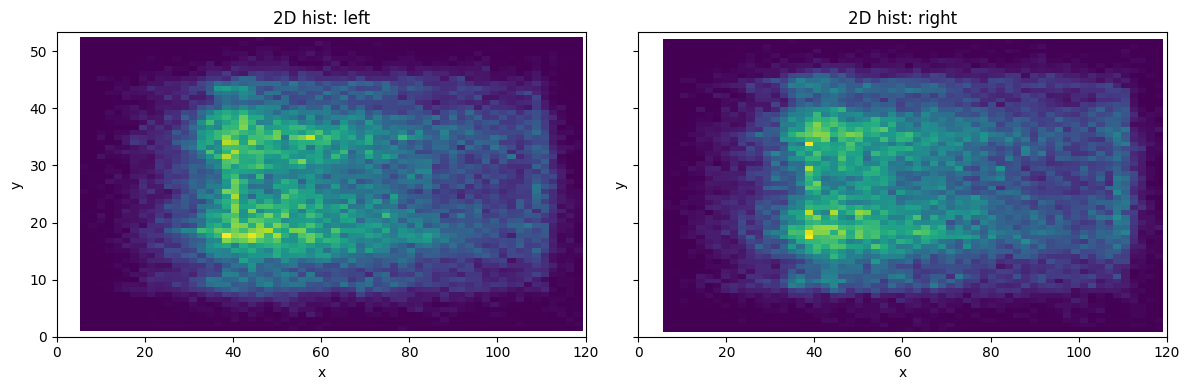

In [ ]:
# SAMPLE (optional for speed)
dfv = processed_df_input.sample(min(len(processed_df_input), 200_000), random_state=42)
# A) Overlaid distributions — should overlap if standardization worked
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.kdeplot(data=dfv, x="x", hue="play_direction", ax=ax[0])
ax[0].set_title("X distribution by original play_direction")
sns.kdeplot(data=dfv, y="y", hue="play_direction", ax=ax[1])
ax[1].set_title("Y distribution by original play_direction")
plt.tight_layout()

# B) Side-by-side 2D histograms for visual symmetry
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)
for a, side in zip(ax, ["left", "right"]):
    sub = dfv[dfv["play_direction"] == side]
    a.hist2d(sub["x"], sub["y"], bins=60)
    a.set_title(f"2D hist: {side}")
    a.set_xlim(0, 120); a.set_ylim(0, 53.3)
    a.set_xlabel("x"); a.set_ylabel("y")
plt.tight_layout()

In [ ]:
# Creating 2 new variables
# First, distance to the ball using player x and y coordinates
processed_df_input['distance_to_ball'] = np.sqrt((processed_df_input['x'] - processed_df_input['ball_land_x']) ** 2 +
                              (processed_df_input['y'] - processed_df_input['ball_land_y']) ** 2)
# Second, BMI(Body Mass Index) calculation using inches and pounds
processed_df_input['BMI'] = (processed_df_input['player_weight'] / (processed_df_input['player_height_in'] ** 2)) * 703

In [ ]:
# check to sort of see whether player weight/height change across games
processed_df_input[processed_df_input['player_name']=='Bryan Cook']


game_id  play_id  player_to_predict  nfl_id  frame_id  \
500      2023090700     1154               True   54527         1   
501      2023090700     1154               True   54527         2   
502      2023090700     1154               True   54527         3   
503      2023090700     1154               True   54527         4   
504      2023090700     1154               True   54527         5   
...             ...      ...                ...     ...       ...   
1113126  2023120310     1509               True   54527        26   
1113127  2023120310     1509               True   54527        27   
1113128  2023120310     1509               True   54527        28   
1113129  2023120310     1509               True   54527        29   
1113130  2023120310     1509               True   54527        30   

        play_direction  absolute_yardline_number player_name player_height  \
500               left                        71  Bryan Cook           6-1   
501               left                        71  Bryan Cook           6-1   
502               left                        71  Bryan Cook           6-1   
503               left                        71  Bryan Cook           6-1   
504               left                        71  Bryan Cook           6-1   
...                ...                       ...         ...           ...   
1113126          right                        40  Bryan Cook           6-1   
1113127          right                        40  Bryan Cook           6-1   
1113128          right                        40  Bryan Cook           6-1   
1113129          right                        40  Bryan Cook           6-1   
1113130          right                        40  Bryan Cook           6-1   

         player_weight player_birth_date player_position player_side  \
500                210        1999-09-07              FS     Defense   
501                210        1999-09-07              FS     Defense   
502                210        1999-09-07              FS     Defense   
503                210        1999-09-07              FS     Defense   
504                210        1999-09-07              FS     Defense   
...                ...               ...             ...         ...   
1113126            210        1999-09-07              FS     Defense   
1113127            210        1999-09-07              FS     Defense   
1113128            210        1999-09-07              FS     Defense   
1113129            210        1999-09-07              FS     Defense   
1113130            210        1999-09-07              FS     Defense   

                player_role      x      y     s     a    dir       o  \
500      Defensive Coverage  62.72  24.29  2.48  2.02  40.70  329.55   
501      Defensive Coverage  62.89  24.49  2.79  2.21  41.83  332.03   
502      Defensive Coverage  63.09  24.70  3.04  2.10  43.23  333.58   
503      Defensive Coverage  63.32  24.93  3.39  2.21  45.72  334.87   
504      Defensive Coverage  63.58  25.18  3.70  2.14  47.35  336.35   
...                     ...    ...    ...   ...   ...    ...     ...   
1113126  Defensive Coverage  54.36  16.98  4.72  2.08  94.44  351.68   
1113127  Defensive Coverage  54.84  16.95  4.94  1.89  93.05    0.08   
1113128  Defensive Coverage  55.36  16.94  5.32  2.46  90.34    9.17   
1113129  Defensive Coverage  55.90  16.95  5.58  2.67  87.77   10.92   
1113130  Defensive Coverage  56.47  16.98  5.77  2.54  85.35    9.43   

         num_frames_output  ball_land_x  ball_land_y  player_height_in  \
500                     12    67.040001        38.06                73   
501                     12    67.040001        38.06                73   
502                     12    67.040001        38.06                73   
503                     12    67.040001        38.06                73   
504                     12    67.040001        38.06                73   
...                    ...          ...          ...               ...  

# EDA:
EDA of variables from notebook:https://www.kaggle.com/code/wafaaalayoubi/step-by-step-eda-for-player-prediction 

field visualization using the code from (https://colab.research.google.com/drive/1lcDnzytmd_-YgdW7omg5u-qGwfpJZEvM)



## Exploring variable correlations and interactions:
In order to explore whether multicolinarity might present a problem.

<Axes: >

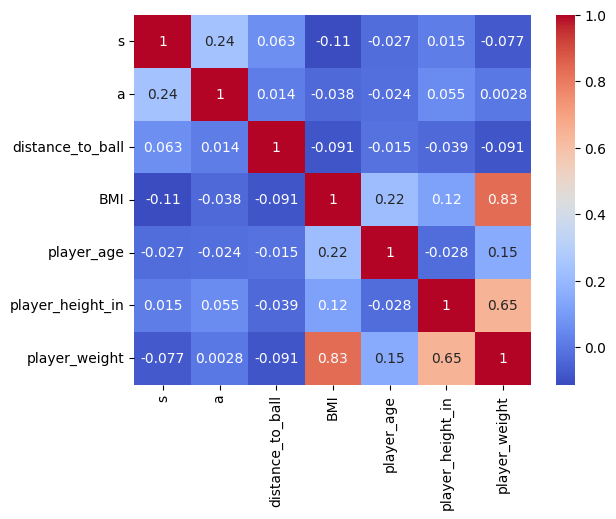

In [ ]:
corr = processed_df_input[['s','a','distance_to_ball','BMI','player_age', 'player_height_in', 'player_weight']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


It comes as no surprise that BMI has a high correlation with both player weight and player height. Therefore, any model containing BMI should exclude both those variables. As for the other variables, s and a show some correlation but not very hight.

## Exploring player level data:
First we explore the player-based data provided in the dataset.

player_name  player_height_in  player_weight        BMI  \
0            Alex Anzalone                75            240  29.994667   
32            Brian Branch                72            193  26.172647   
64            Jerry Jacobs                71            198  27.612378   
96       Malcolm Rodriguez                71            225  31.377703   
128        Jerick McKinnon                69            205  30.269901   
...                    ...               ...            ...        ...   
1282051          Nick Muse                76            250  30.427632   
1282388    Jaylin Williams                72            180  24.409722   
1284381     Solomon Thomas                74            280  35.945946   
1295450      Tyler Johnson                74            205  26.317568   
1298888   A'Shawn Robinson                76            330  40.164474   

         player_age player_position player_side  
0             31.12             OLB     Defense  
32            24.04              SS     Defense  
64            28.11              CB     Defense  
96            26.60             ILB     Defense  
128           33.51              RB     Offense  
...             ...             ...         ...  
1282051       26.94              TE     Offense  
1282388       25.69              CB     Defense  
1284381       30.19              DT     Defense  
1295450       27.20              WR     Offense  
1298888       30.63              DE     Defense  

[1180 rows x 7 columns]

<Axes: xlabel='BMI', ylabel='Count'>

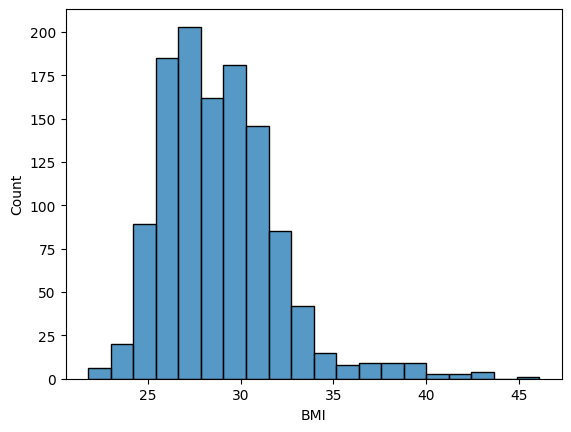

In [ ]:
player_summary = (processed_df_input[['player_name','player_height_in','player_weight','BMI','player_age','player_position','player_side']].drop_duplicates())
display(player_summary)
sns.histplot(player_summary['BMI'], bins=20)


<Axes: xlabel='player_position', ylabel='BMI'>

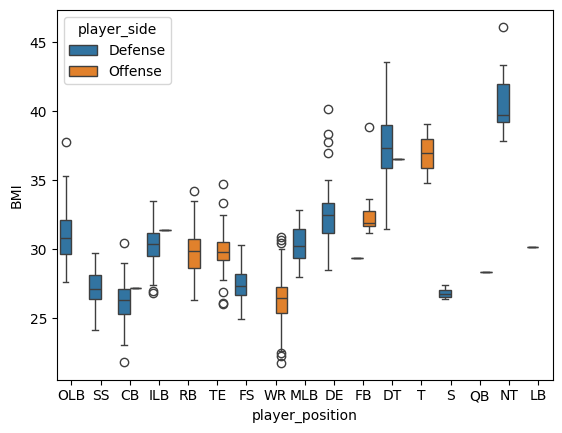

In [ ]:
sns.boxplot(x='player_position', y='BMI', hue='player_side', data=player_summary)

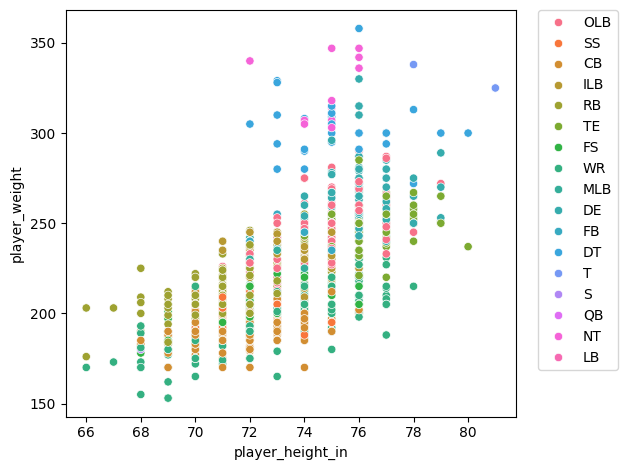

In [ ]:
sns.scatterplot(x='player_height_in', y='player_weight', hue='player_position', data=player_summary)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

## Motion- related EDA:
Exploring the data related to player/ball movement.

<Axes: xlabel='s', ylabel='Count'>

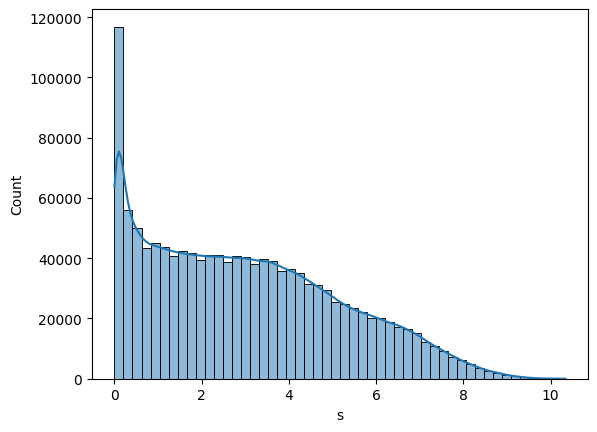

In [ ]:
sns.histplot(processed_df_input['s'], bins=50, kde=True)

<Axes: xlabel='s', ylabel='a'>

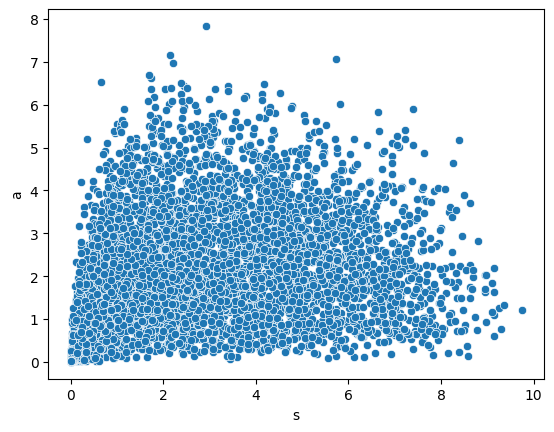

In [ ]:
sns.scatterplot(x='s', y='a', data=processed_df_input.sample(5000))  # subset to plot faster

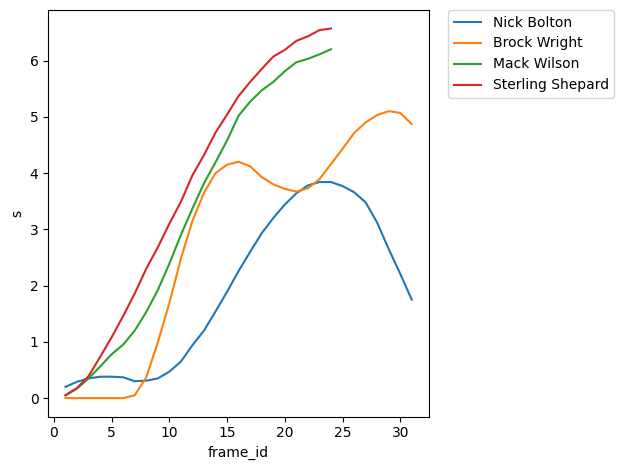

In [ ]:
sns.lineplot(x='frame_id', y='s', hue='player_name', data=processed_df_input.query("play_id==1069"))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

## Spatial analysis:
Plot player positions on the field

(0.0, 53.3)

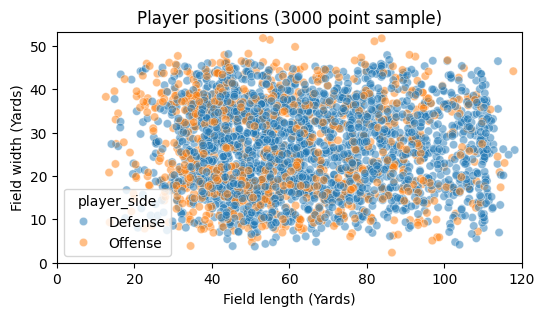

In [ ]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='x', y='y', hue='player_side', data=processed_df_input.sample(3000), alpha=0.5)
plt.title('Player positions (3000 point sample)')
plt.xlabel('Field length (Yards)')
plt.ylabel('Field width (Yards)')
plt.xlim(0, 120); plt.ylim(0, 53.3)

## Group by frame to see how plays evolve
We choose one play and one game randomly

<Axes: xlabel='frame_id', ylabel='distance_to_ball'>

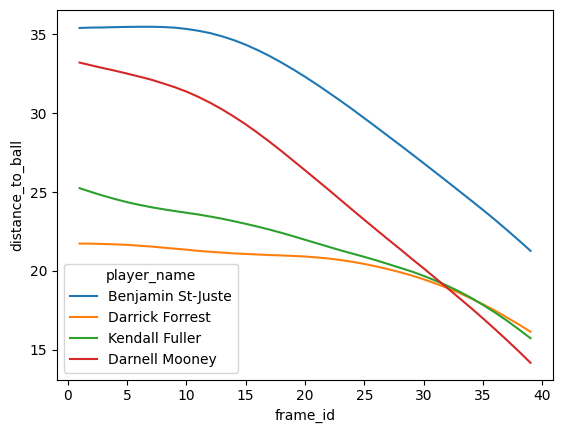

In [ ]:
play = processed_df_input.query("game_id==2023100500 and play_id==56")
sns.lineplot(x='frame_id', y='distance_to_ball', data=play, hue='player_name')


## Summarize per player or play for modeling

In [ ]:
summary = (processed_df_input.groupby(['game_id','play_id','player_name'])
           .agg({'s':'mean', 'a':'mean', 'distance_to_ball':'min'}).reset_index())
summary


game_id  play_id     player_name         s         a  \
0      2023090700      101   Josh Reynolds  4.611154  2.975769   
1      2023090700      101     Justin Reid  2.212308  1.363462   
2      2023090700      101  L'Jarius Sneed  1.910000  2.445385   
3      2023090700      194   Alex Anzalone  0.576875  1.247812   
4      2023090700      194    Brian Branch  3.840313  2.715937   
...           ...      ...             ...       ...       ...   
46040  2024010713     3995     Tyreek Hill  4.726786  3.039286   
46041  2024010713     4018  Chase Claypool  4.811481  2.291481   
46042  2024010713     4018    Dane Jackson  2.907037  1.864444   
46043  2024010713     4018   Taron Johnson  4.420741  2.343704   
46044  2024010713     4018     Taylor Rapp  3.178148  1.362593   

       distance_to_ball  
0             17.986063  
1             19.375388  
2             19.820143  
3              9.488862  
4              0.470105  
...                 ...  
46040         11.193770  
46041         12.275871  
46042         13.820710  
46043         13.053019  
46044          8.652364  

[46045 rows x 6 columns]

## computing per player average performance

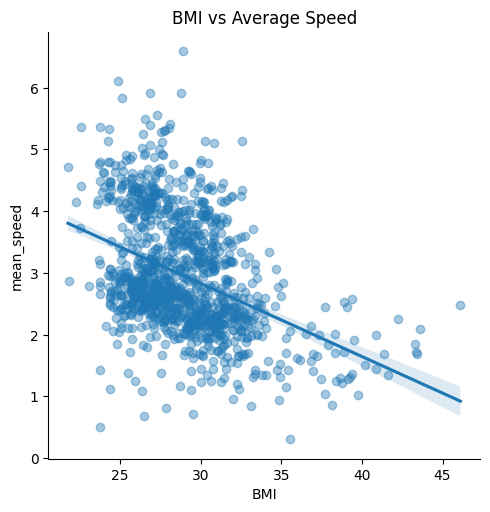

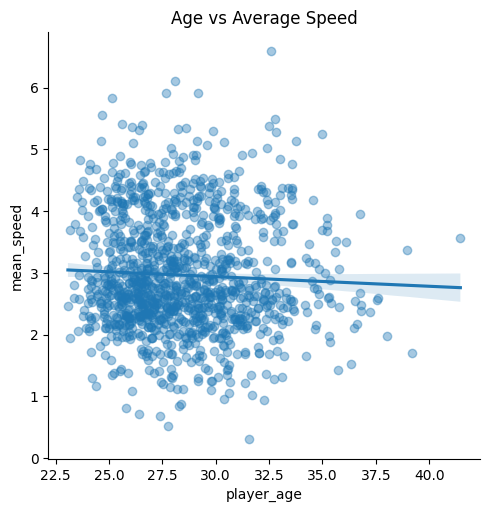

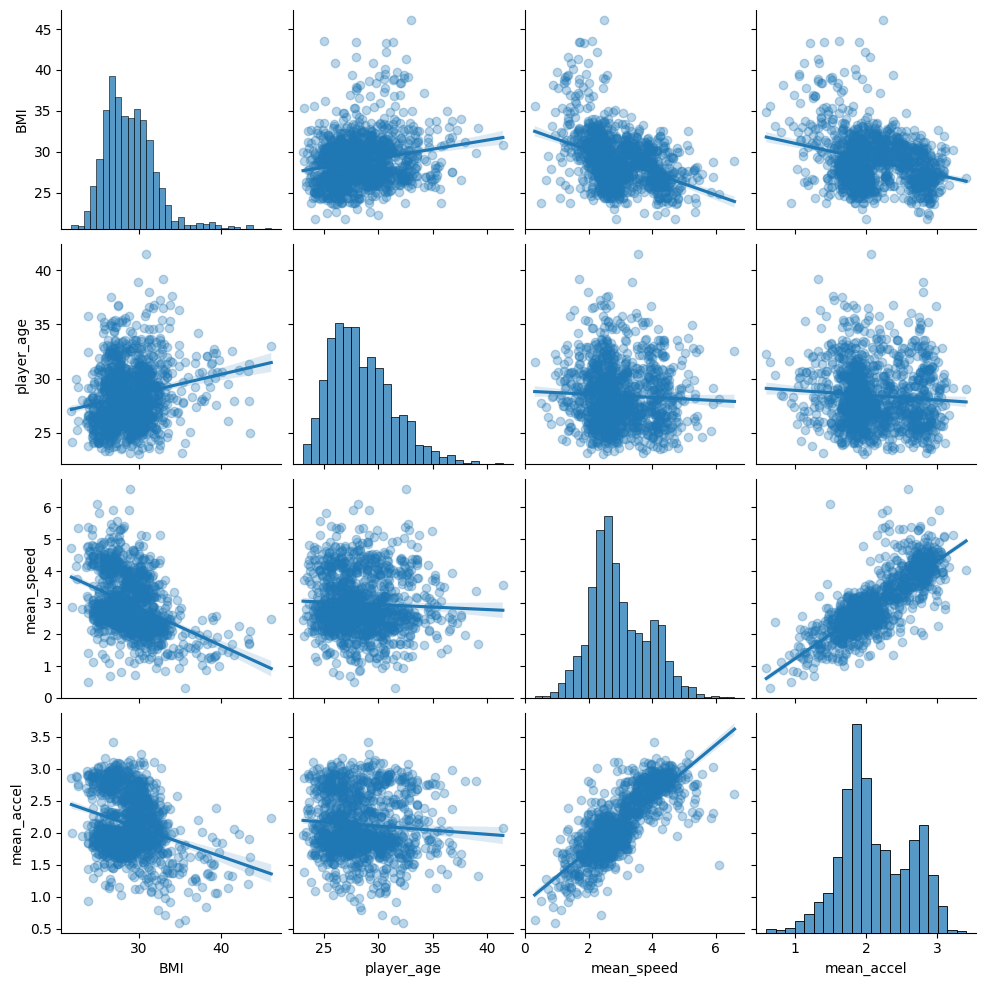

In [ ]:
# Aggregate per player (you can also do per player-per-play)
perf = (processed_df_input
        .groupby("nfl_id", as_index=False)
        .agg(mean_speed=("s", "mean"),
             mean_accel=("a", "mean"),
             BMI=("BMI", "first"),
             player_age=("player_age", "first"),
             player_position=("player_position", "first")))

# A) Simple regressions (scatter + fit line)
sns.lmplot(data=perf, x="BMI", y="mean_speed", scatter_kws={"alpha":0.4})
plt.title("BMI vs Average Speed")

sns.lmplot(data=perf, x="player_age", y="mean_speed", scatter_kws={"alpha":0.4})
plt.title("Age vs Average Speed")

# B) Pairplot to see multiple relationships at once
sns.pairplot(perf[["BMI","player_age","mean_speed","mean_accel"]], kind="reg", plot_kws={"scatter_kws":{"alpha":0.3}})


## Heatmaps of player positions across frames

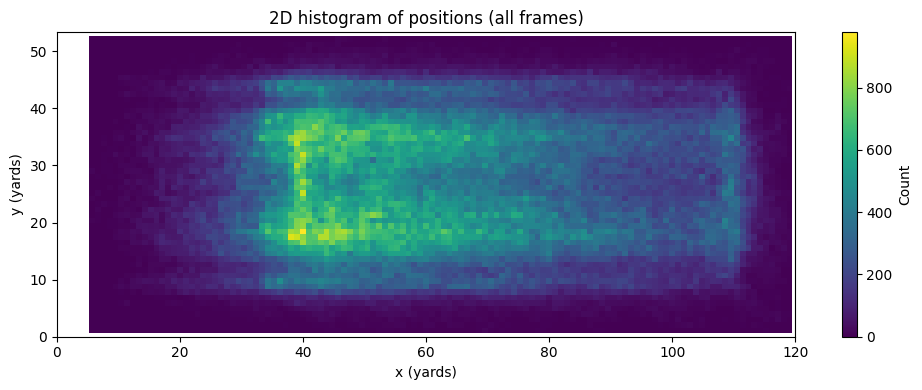

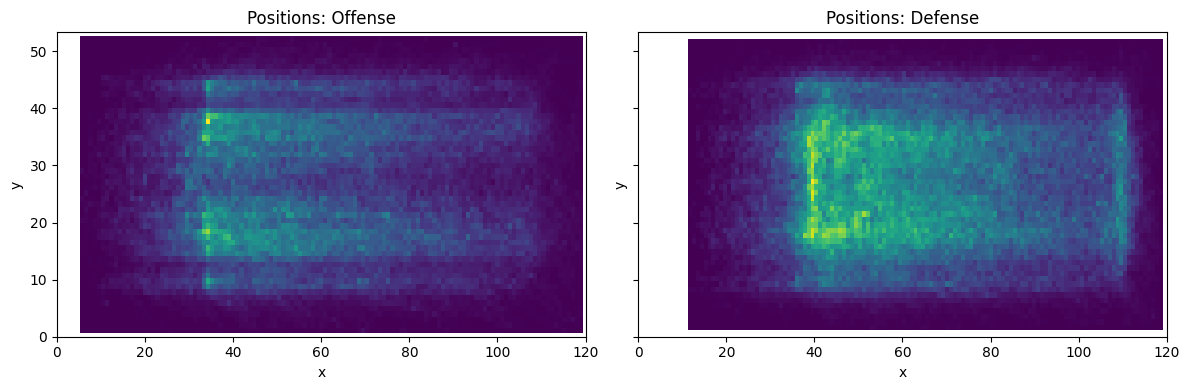

In [ ]:
# All players
plt.figure(figsize=(10, 4))
plt.hist2d(processed_df_input["x"], processed_df_input["y"], bins=[120, 54])
plt.colorbar(label="Count")
plt.title("2D histogram of positions (all frames)")
plt.xlabel("x (yards)"); plt.ylabel("y (yards)")
plt.xlim(0, 120); plt.ylim(0, 53.3)
plt.tight_layout()

# By side (offense/defense) — two panels
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)
for a, side in zip(ax, ["Offense", "Defense"]):
    sub = processed_df_input[processed_df_input["player_side"] == side]
    a.hist2d(sub["x"], sub["y"], bins=[120, 54])
    a.set_title(f"Positions: {side}")
    a.set_xlim(0,120); a.set_ylim(0,53.3)
    a.set_xlabel("x"); a.set_ylabel("y")
plt.tight_layout()


# Interesting visualtization perhaps?

In [ ]:
ROLE_COLORS = {
    "Targeted Receiver": "red",
    "Passer": "blue",
    "Defensive Coverage": "darkred",
    "Other Route Runner": "orange",
}

def draw_field(ax, start_x=0.0, end_x=120.0, play_direction="right"):
    """Draw an NFL field with endzones, yard lines, and hash marks."""
    field_len = end_x - start_x
    left_goal, right_goal = start_x + 10.0, end_x - 10.0

    # Field + endzones
    if play_direction == "right":
        left_color, right_color = "lightblue", "#f4cccc"
    else:
        left_color, right_color = "#f4cccc", "lightblue"
    ax.add_patch(Rectangle((start_x, 0), field_len, 53.3, facecolor='forestgreen', edgecolor='black', lw=2, zorder=0))
    ax.add_patch(Rectangle((start_x, 0), 10, 53.3, facecolor=left_color, zorder=1))
    ax.add_patch(Rectangle((end_x - 10, 0), 10, 53.3, facecolor=right_color, zorder=1))

    # Sideline ticks
    for x in np.arange(start_x, end_x + 0.1, 1.0):
        for y in [0.4, 53.3 - 0.4]:
            ax.plot([x, x], [y, y + 0.5], color='white', lw=0.4, zorder=2)

    # Yard lines
    for x in np.arange(start_x + 10.0, end_x, 10.0):
        ax.plot([x, x], [0, 53.3], color='white', lw=1.6, zorder=2)

    # Yard numbers
    num_positions = np.arange(start_x + 20.0, end_x - 9.99, 10.0)
    for p in num_positions:
        d = p - left_goal
        label = int(min(d, 100.0 - d))
        ax.text(p, 5, str(label), color='white', fontsize=12, ha='center', va='center')
        ax.text(p, 53.3 - 5, str(label), color='white', fontsize=12, ha='center', va='center')

    # Inbounds hash marks (subtle, semi-transparent)
    hash_y = [18.37, 34.93]
    for x in np.arange(start_x + 10, end_x - 10 + 0.1, 1.0):
        for y in hash_y:
            ax.plot([x, x], [y, y + 0.4], color='white', lw=0.8, alpha=0.5, zorder=2)

    # Limits / aspect
    ax.set_xlim(start_x, end_x)
    ax.set_ylim(0, 53.3)
    ax.set_aspect('equal')
    ax.axis('off')


def draw_legend(ax):
    """Legend for player roles."""
    handles = [Line2D([0], [0], marker='o', color='w', label=role,
                      markerfacecolor=color, markersize=10)
               for role, color in ROLE_COLORS.items()]
    ax.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.07),
              ncol=len(handles), framealpha=0.9, frameon=False)


def animate_play(game_id, play_id, df_in, df_out,
                 show_output=True, figsize=(12, 5.33), save_path=None, subsample=1,
                 orientation_length=1.5):
    """Animate player movements for a single play with orientation as lines."""
    in_play = df_in.query("game_id==@game_id & play_id==@play_id").sort_values("frame_id")
    out_play = df_out.query("game_id==@game_id & play_id==@play_id").sort_values("frame_id")
    play_dir = in_play.play_direction.iloc[0]

    if subsample > 1:
        in_play = in_play[in_play["frame_id"] % subsample == 0]
        if not out_play.empty:
            out_play = out_play[out_play["frame_id"] % subsample == 0]

    # Build frames
    frames = []
    for _, grp in in_play.groupby("frame_id"):
        frames.append([dict(x=r.x, y=r.y,
                            color=ROLE_COLORS.get(r.player_role, 'gray'),
                            nfl_id=r.nfl_id,
                            o=getattr(r, "o", None))  # include orientation
                       for _, r in grp.iterrows()])

    if show_output and not out_play.empty:
        ball_x = in_play.ball_land_x.iloc[0]
        ball_y = in_play.ball_land_y.iloc[0]

        out_with_role = out_play.merge(
            in_play[['game_id', 'play_id', 'nfl_id', 'player_role']],
            on=['game_id','play_id','nfl_id'],
            how='left'
        )

        for frame_id, grp in out_with_role.groupby("frame_id"):
            frame_data = [
                dict(
                    x=r.x,
                    y=r.y,
                    color=ROLE_COLORS.get(r.player_role, 'gray'),
                    nfl_id=r.nfl_id,
                    o=None
                ) for _, r in grp.iterrows()
            ]

            # add the ball
            frame_data.append(dict(x=ball_x, y=ball_y, color='black', nfl_id="BALL", 
                                   size=50, zorder=1, marker='X'))
            frames.append(frame_data)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    draw_field(ax, play_direction=play_dir)
    draw_legend(ax)
    fig.suptitle(f"Game: {game_id} | Play: {play_id}", fontsize=14, fontweight="bold", y=0.98)

    scat = ax.scatter([], [], s=80, zorder=5)
    max_players = max(len(f) for f in frames)
    texts = [ax.text(0, 0, "", fontsize=6, zorder=6) for _ in range(max_players)]
    orientation_lines = [ax.plot([], [], lw=1, zorder=4)[0] for _ in range(max_players)]

    def init():
        scat.set_offsets(np.zeros((0, 2)))
        for line in orientation_lines:
            line.set_data([], [])
        return (scat, *texts, *orientation_lines)

    def update(i):
        coords = np.array([[p['x'], p['y']] for p in frames[i]])
        scat.set_offsets(coords)
        scat.set_color([p['color'] for p in frames[i]])

        for idx, (t, line, p) in enumerate(zip(texts, orientation_lines, frames[i])):
            # text
            t.set_position((p['x'] + 0.5, p['y'] + 0.5))
            try:
                label = str(int(p['nfl_id']))
            except (ValueError, TypeError):
                label = str(p['nfl_id'])
            t.set_text(label)
            t.set_fontsize(6)
            t.set_fontweight('normal')
            t.set_visible(True)

            # orientation line only if orientation exists
            if p.get('o') is not None and not pd.isna(p['o']):
                angle_rad = np.deg2rad(p['o'])
                length = orientation_length

                # Thank you Robert Hatch for correcting
                x_end = p['x'] + length * np.sin(angle_rad)
                y_end = p['y'] + length * np.cos(angle_rad)

                line.set_data([p['x'], x_end], [p['y'], y_end])
                line.set_color(p['color'])
                line.set_visible(True)
            else:
                line.set_data([], [])
                line.set_visible(False)

        for t in texts[len(frames[i]):]:
            t.set_visible(False)
        for line in orientation_lines[len(frames[i]):]:
            line.set_visible(False)

        return (scat, *texts, *orientation_lines)

    anim = animation.FuncAnimation(fig, update, frames=len(frames),
                                   init_func=init, blit=True, interval=100)

    plt.close(fig)
    if save_path:
        anim.save(save_path, fps=10, dpi=150)
        print(f"Saved animation to {save_path}")
    else:
        return anim


In [ ]:
SUBSAMPLE = 1 # Optional subsampling (e.g. use 2 to keep every 2nd frame for speed)

GAME_ID = df_input['game_id'].iloc[1]
PLAY_ID = df_input.query("game_id==@GAME_ID")['play_id'].iloc[1]

anim = animate_play(GAME_ID, PLAY_ID, df_input, df_output, subsample=SUBSAMPLE)
HTML(anim.to_jshtml())

In [ ]:

# Animation code edited to prevent players disappearing.

ROLE_COLORS = {
    "Targeted Receiver": "red",
    "Passer": "blue",
    "Defensive Coverage": "darkred",
    "Other Route Runner": "orange",
}

# --------------------------
# Field drawing
# --------------------------
def draw_field(ax, start_x=0.0, end_x=120.0, play_direction="right"):
    """Draw an NFL field with endzones, yard lines, hash marks."""
    field_len = end_x - start_x
    left_goal, right_goal = start_x + 10.0, end_x - 10.0

    # Field + endzones
    left_color, right_color = ("lightblue", "#f4cccc") if play_direction == "right" else ("#f4cccc", "lightblue")
    ax.add_patch(Rectangle((start_x, 0), field_len, 53.3, facecolor='forestgreen',
                           edgecolor='black', lw=2, zorder=0))
    ax.add_patch(Rectangle((start_x, 0), 10, 53.3, facecolor=left_color, zorder=1))
    ax.add_patch(Rectangle((end_x - 10, 0), 10, 53.3, facecolor=right_color, zorder=1))

    # Sideline ticks
    for x in np.arange(start_x, end_x + 0.1, 1.0):
        for y in [0.4, 53.3 - 0.4]:
            ax.plot([x, x], [y, y + 0.5], color='white', lw=0.4, zorder=2)

    # Yard lines
    for x in np.arange(start_x + 10.0, end_x, 10.0):
        ax.plot([x, x], [0, 53.3], color='white', lw=1.6, zorder=2)

    # Yard numbers
    num_positions = np.arange(start_x + 20.0, end_x - 9.99, 10.0)
    for p in num_positions:
        d = p - left_goal
        label = int(min(d, 100.0 - d))
        ax.text(p, 5, str(label), color='white', fontsize=12, ha='center', va='center')
        ax.text(p, 53.3 - 5, str(label), color='white', fontsize=12, ha='center', va='center')

    # In-bounds hash marks (subtle)
    hash_y = [18.37, 34.93]
    for x in np.arange(start_x + 10, end_x - 10 + 0.1, 1.0):
        for y in hash_y:
            ax.plot([x, x], [y, y + 0.4], color='white', lw=0.8, alpha=0.5, zorder=2)

    # Limits / aspect
    ax.set_xlim(start_x, end_x)
    ax.set_ylim(0, 53.3)
    ax.set_aspect('equal')
    ax.axis('off')

def draw_legend(ax):
    handles = [Line2D([0], [0], marker='o', color='w', label=role,
                      markerfacecolor=color, markersize=10)
               for role, color in ROLE_COLORS.items()]
    ax.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.07),
              ncol=len(handles), framealpha=0.9, frameon=False)

# --------------------------
# Animation
# --------------------------
def animate_play(game_id, play_id, df_input, df_output,
                 show_output=True, figsize=(12, 5.33), save_path=None, subsample=1):
    """
    Animate a single play. Players from df_in are shown every frame;
    df_out points are OVERLAID on the SAME frames (so players don't 'disappear').
    Ball is drawn every frame as a separate scatter marker.
    """
    # ---- slice the play ----
    in_play = (df_input.query("game_id==@game_id & play_id==@play_id")
                    .sort_values(["frame_id", "nfl_id"]))
    out_play = (df_output.query("game_id==@game_id & play_id==@play_id")
                     .sort_values(["frame_id", "nfl_id"]))

    play_dir = in_play.play_direction.iloc[0]

    # optional subsampling by frame_id
    if subsample > 1:
        in_play = in_play[in_play["frame_id"] % subsample == 0]
        if not out_play.empty:
            out_play = out_play[out_play["frame_id"] % subsample == 0]

    # ---- build a dict of frame_id -> list of player dicts (from df_in) ----
    frame_map = {}
    for fid, grp in in_play.groupby("frame_id"):
        frame_map[fid] = [
            dict(x=r.x, y=r.y,
                 color=ROLE_COLORS.get(r.player_role, 'gray'),
                 nfl_id=r.nfl_id)   # NO orientation lines anymore
            for _, r in grp.iterrows()
        ]

    # ---- overlay df_out points on the SAME frames (no replacements) ----
    if show_output and not out_play.empty:
        # bring roles over for coloring
        out_with_role = out_play.merge(
            in_play[['game_id','play_id','nfl_id','player_role']].drop_duplicates(),
            on=['game_id','play_id','nfl_id'], how='left'
        )
        for fid, grp in out_with_role.groupby("frame_id"):
            frame_map.setdefault(fid, [])
            frame_map[fid].extend([
                dict(x=r.x, y=r.y,
                     color=ROLE_COLORS.get(r.player_role, 'gray'),
                     nfl_id=r.nfl_id)
                for _, r in grp.iterrows()
            ])

    # ---- ball location (constant landing spot) ----
    ball_x = in_play.ball_land_x.iloc[0]
    ball_y = in_play.ball_land_y.iloc[0]

    # ensure every frame id appears in order
    all_fids = sorted(frame_map)
    frames = [frame_map[fid] for fid in all_fids]

    # ---- plot scaffolding ----
    fig, ax = plt.subplots(figsize=figsize)
    draw_field(ax, play_direction=play_dir)
    draw_legend(ax)
    fig.suptitle(f"Game: {game_id} | Play: {play_id}", fontsize=14, fontweight="bold", y=0.98)

    # one scatter for players, one for ball, and per-player text labels
    player_scat = ax.scatter([], [], s=80, zorder=5)
    ball_scat   = ax.scatter([], [], s=50, zorder=6, c='black', marker='X')
    ball_label  = ax.text(0, 0, "BALL", fontsize=7, color='black', fontweight='bold', zorder=7)

    max_players = max(len(f) for f in frames)
    texts = [ax.text(0, 0, "", fontsize=6, zorder=6) for _ in range(max_players)]

    # ---- init ----
    def init():
        player_scat.set_offsets(np.zeros((0, 2)))
        ball_scat.set_offsets(np.zeros((0, 2)))
        for t in texts:
            t.set_visible(False)
            ball_label.set_visible(False)
        return (player_scat, ball_scat, ball_label, *texts)

    # ---- per-frame update ----
    def update(i):
        # players
        coords = np.array([[p['x'], p['y']] for p in frames[i]])
        colors = [p['color'] for p in frames[i]]
        player_scat.set_offsets(coords)
        player_scat.set_color(colors)

        # labels for players
        for idx, (t, p) in enumerate(zip(texts, frames[i])):
            t.set_position((p['x'] + 0.5, p['y'] + 0.5))
            try:
                label = str(int(p['nfl_id']))
            except (ValueError, TypeError):
                label = str(p['nfl_id'])
            t.set_text(label)
            t.set_fontsize(6)
            t.set_visible(True)
        for t in texts[len(frames[i]):]:
            t.set_visible(False)

        # ball (constant landing spot in this example)
        ball_scat.set_offsets(np.array([[ball_x, ball_y]]))
        ball_label.set_position((ball_x + 0.5, ball_y + 0.5))
        ball_label.set_visible(True)

        return (player_scat, ball_scat, ball_label, *texts)

    anim = animation.FuncAnimation(fig, update, frames=len(frames),
                                   init_func=init, blit=True, interval=100)
    plt.close(fig)

    if save_path:
        # If you want an HTML5 video, ensure ffmpeg is available or use to_jshtml()
        anim.save(save_path, fps=10, dpi=150)
        print(f"Saved animation to {save_path}")
    else:
        return anim


In [ ]:
SUBSAMPLE = 1
GAME_ID = df_input['game_id'].iloc[1]
PLAY_ID = df_input.query("game_id==@GAME_ID")['play_id'].iloc[1]

anim = animate_play(GAME_ID, PLAY_ID, df_input, df_output, subsample=SUBSAMPLE)
HTML(anim.to_jshtml())


# Model prep:
Making dummies for categorical variables

In [ ]:
position_dummies = pd.get_dummies(processed_df_input['player_position'], prefix='position')
role_dummies = pd.get_dummies(processed_df_input['player_role'], prefix='role')

df_input = pd.concat([processed_df_input, position_dummies, role_dummies], axis=1)
feature_columns = [
    'absolute_yardline_number',
    'x_input',  # Current x coordinate
    'y_input',  # Current y coordinate
    's',  # Speed
    'a',  # Acceleration
    'dir',  # Direction
    'o',  # Orientation
    'num_frames_output',  # Number of frames to predict
    'ball_land_x',  # Ball landing x
    'ball_land_y',  # Ball landing y
    'bmi' # Body Mass Index
]
feature_columns.append('play_direction_encoded')
feature_columns.extend(position_dummies.columns.tolist())
feature_columns.extend(role_dummies.columns.tolist())

There is one final feature I thought of creating which is the percentage of games played by a particular player but that needs to be only created in the training data so I will do it after selecting the training data.
Need to check if any missing data were created 

In [ ]:
processed_df_input.isna().sum()

game_id                     0
play_id                     0
player_to_predict           0
nfl_id                      0
frame_id                    0
play_direction              0
absolute_yardline_number    0
player_name                 0
player_height               0
player_weight               0
player_birth_date           0
player_position             0
player_side                 0
player_role                 0
x                           0
y                           0
s                           0
a                           0
dir                         0
o                           0
num_frames_output           0
ball_land_x                 0
ball_land_y                 0
player_height_in            0
player_age                  0
position_CB                 0
position_DE                 0
position_DT                 0
position_FB                 0
position_FS                 0
position_ILB                0
position_LB                 0
position_MLB                0
position_N

# Splitting data into training and test sets

In [ ]:
y_x = processed_df_input['x_output']
y_y = processed_df_input['y_output']
y = np.column_stack([y_x, y_y])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Target shape: {y_train.shape} (samples, [x, y])')

NameError: name 'processed_df_input' is not defined